In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("steam_games_clean.csv")

## Análisis de variables numéricas


In [4]:
df.head()

,genres,title,release_date,price,id,developer
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,0.00,643980,Secret Level SRL
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,0.00,670290,Poolians.com
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,0.99,767400,彼岸领域
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018-01-04,3.99,772540,Trickjump Games Ltd


In [5]:
df["price"].describe()

count    27617.000000
mean         9.004576
std         15.956906
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

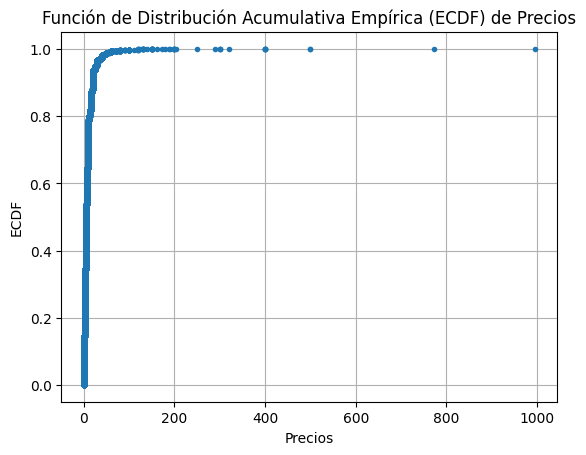

In [6]:
#Probé con varios plots pero al estar la mayoría de valores en un rango pequeño no me revelaban mucho pero encontré este gráfico que sirve bastante.

precios = df['price']
precios_ordenados = np.sort(precios)

plt.plot(precios_ordenados, np.arange(1, len(precios_ordenados) + 1) / len(precios_ordenados), marker='.', linestyle='none')
plt.xlabel('Precios')
plt.ylabel('ECDF')
plt.title('Función de Distribución Acumulativa Empírica (ECDF) de Precios')
plt.grid(True)
plt.show()

In [7]:
df["price"].value_counts()

price
4.99      3860
9.99      3584
2.99      3178
0.99      2478
1.99      2251
          ... 
4.68         1
131.40       1
44.98        1
202.76       1
160.91       1
Name: count, Length: 135, dtype: int64

In [8]:
#Parecen haber valores demasiado elevados por lo que chequié en la database de steam y hay algunos juegos que pude encontrar un 
#un precio real mas bajo por lo que los cambié manualmente.
df[df["price"]>250]

,genres,title,release_date,price,id,developer
2243,['Simulation'],X-Plane 10 Global - 64 Bit,2014-07-14,771.71,292180,Laminar Research
4081,"['Animation &amp; Modeling', 'Design &amp; Ill...",MODO indie 10,2015-09-24,299.99,401090,The Foundry
7939,"['Animation &amp; Modeling', 'Design &amp; Ill...",GameMaker Studio 2 Mobile,2017-03-08,399.99,585620,YoYo Games Ltd.
7940,"['Animation &amp; Modeling', 'Design &amp; Ill...",GameMaker Studio 2 UWP,2017-03-08,399.99,585610,YoYo Games Ltd.
8210,['Video Production'],MAGIX Video Pro X8 Steam Edition,2017-04-11,399.00,598860,MAGIX Software GmbH
10151,"['Animation &amp; Modeling', 'Design &amp; Ill...",Marvelous Designer 7 For Steam,2017-09-28,320.00,707410,CLO Virtual Fashion
10448,"['Animation &amp; Modeling', 'Design &amp; Ill...",Strata Spaces VR – Professional Edition Upgrade,2017-10-26,995.00,719000,"Strata Mixed Reality, Inc."
11777,['Video Production'],MAGIX Video Pro X9 Steam Edition,2017-11-28,399.00,750840,MAGIX Software GmbH
12235,"['Animation &amp; Modeling', 'Design &amp; Ill...",CUR3D Maker Edition - Permission for commercia...,2017-11-06,499.99,691560,RUHRSOURCE GmbH
13519,"['Audio Production', 'Video Production']",VEGAS Pro 15 Edit Steam Edition,2017-09-05,399.00,689790,MAGIX Software GmbH


In [9]:
df.loc[90702, 'price'] = 19.99
df.loc[92755, 'price'] = 14.99
df.loc[97384, 'price'] = 74.99
df.loc[97385, 'price'] = 74.99
df.loc[97727, 'price'] = 79.80
df.loc[100045, 'price'] = 199.99
df.loc[102614, 'price'] = 199.99
df.loc[104156, 'price'] = 78.98
df.loc[105948, 'price'] = 149.99
df.loc[115162, 'price'] = 19.99
df.loc[97384, 'price'] = 74.99
df.loc[97384, 'price'] = 74.99

In [10]:
#Me quedo con los valores de precio menores a 200 para hacer mas análisis.
df = df[df['price'] <= 200]

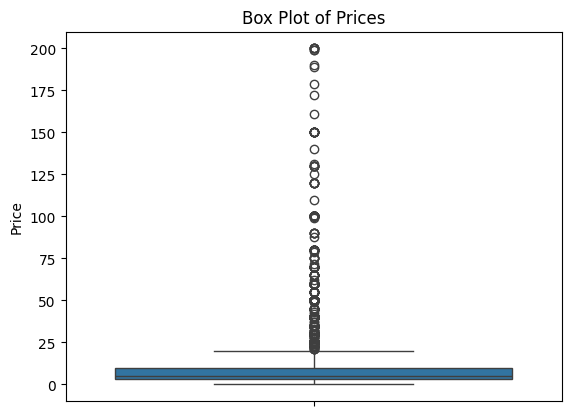

In [11]:
sns.boxplot(y=df.price)
plt.ylabel('Price')
plt.title('Box Plot of Prices')
plt.show()

## Análisis de variables categóricas

In [12]:
#Desgloso los valores de la columna genres
genres = df['genres'].str.split(',').explode().str.strip()
genres = genres.str.replace(r"[\[\]']", '', regex=True)

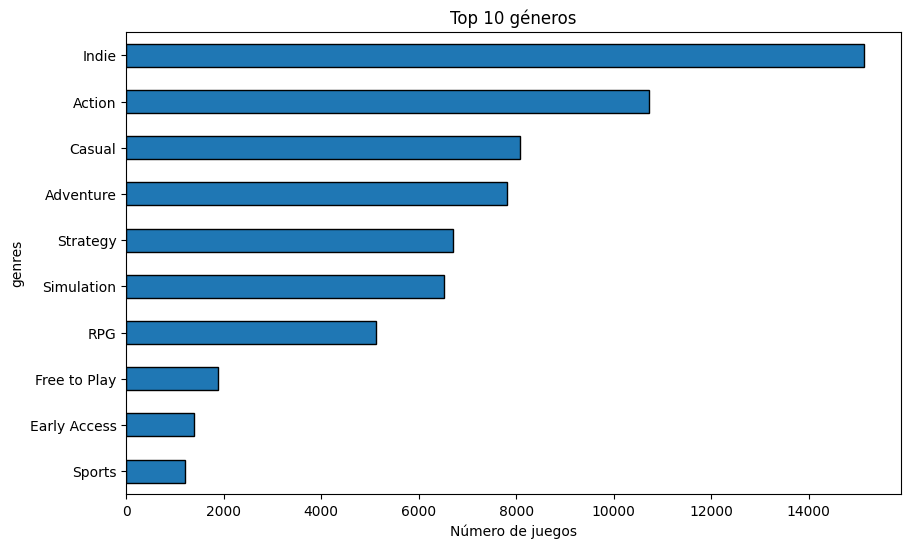

In [13]:
#Cuento cuantos juegos hay para cada género y hago un ranking.
genres_count = genres.value_counts()
plt.figure(figsize=(10, 6))
genres_count.head(10).sort_values().plot(kind='barh',edgecolor='black')
plt.xlabel('Número de juegos')
plt.title('Top 10 géneros')
plt.show()

In [14]:
#Creo una columna de año para hacer análisis temporal.

df['release_year'] = pd.to_datetime(df['release_date']).dt.year

ValueError: time data "Jun 2009" doesn't match format "%Y-%m-%d", at position 220. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [24]:
#Parece haber valores con formato incorrecto por lo que los selecciono para ver si son muchos.
patron = r'^\d{4}-\d{2}-\d{2}$'
valid_dates = df[pd.notna(df['release_date'])]
fechas_validas = valid_dates[valid_dates['release_date'].str.match(patron)]
fechas_invalidas = df[~df.index.isin(fechas_validas.index)]


In [25]:
fechas_invalidas

,genres,title,release_date,price,id,developer
220,"['Adventure', 'Indie']",Blueberry Garden,Jun 2009,4.99,29160.0,Erik Svedäng
463,"['RPG', 'Strategy']",Age of Wonders II: The Wizard's Throne,Oct 2010,9.99,61510.0,Triumph Studios
466,"['RPG', 'Strategy']",Age of Wonders Shadow Magic,Oct 2010,9.99,61520.0,Triumph Studios
467,"['RPG', 'Strategy']",Age of Wonders,Oct 2010,5.99,61500.0,Triumph Studios
550,['Racing'],Test Drive Unlimited 2,Feb 2011,19.99,9930.0,Eden Studios
2429,"['Action', 'Indie', 'Racing', 'Simulation', 'S...",Altitude0: Lower &amp; Faster,Sep 2014,18.99,308080.0,Gugila
3242,"['Action', 'Adventure']",Far Cry® 4 Valley of the Yetis,Apr 2015,14.99,324344.0,"Ubisoft Montreal, Red Storm, Shanghai, Toronto..."
5429,"['Action', 'Adventure', 'Casual', 'Indie', 'St...",Magma Chamber,Apr 2016,4.99,463240.0,IndieKeep Games
5975,['Utilities'],3DMark Time Spy benchmark,Jul 2016,0.00,496100.0,Futuremark
9138,"['Indie', 'Early Access']",Juke,Jul 2017,4.99,665780.0,Jello Godfri


In [27]:
#Parecen ser pocas por lo que me quedo con el resto.

df = fechas_validas

In [29]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
año_estreno_cuenta = df['release_year'].value_counts().sort_index()

C:\Users\lucas\AppData\Local\Temp\ipykernel_8516\816798694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = pd.to_datetime(df['release_date']).dt.year


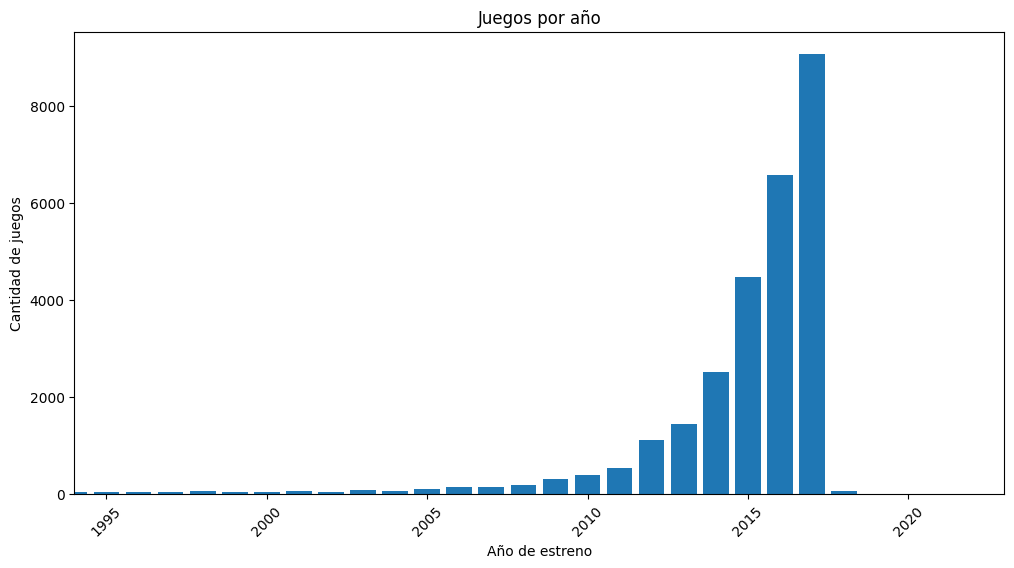

In [30]:
plt.figure(figsize=(12, 6))
plt.bar(año_estreno_cuenta.index, año_estreno_cuenta.values)
plt.xlabel('Año de estreno')
plt.ylabel('Cantidad de juegos')
plt.title('Juegos por año')
plt.xlim(1994, 2023)
plt.xticks(rotation=45)
plt.show()

In [32]:
#Dropeo la columna release_date y me quedo con el dataframe para realizar los endpoints
df = df.drop(columns="release_date")
df.to_csv('steam_games_clean.csv', index=False)